# Steady-state simulation with regulation

### Load data

In [157]:
media = pd.read_csv('../input/media_db.tsv',sep='\t')
media = media.groupby('medium').agg({'compound': set})['compound'].to_dict()

env_cellb = Environment.from_compounds(media['DM_cellobiose'], max_uptake=1000)
env_cellb['R_EX_h2o_e'] = (-1000,1000)




In [158]:
chemostat= pd.read_excel('../input/Guedon1999_chemostat_data.xlsx', sheet_name='Sheet1', header=None, index_col=0, usecols="A:H")
mu = chemostat.iloc[0,:].values
q_cellb = chemostat.iloc[1,:].values
q_ac = chemostat.iloc[2,:].values * chemostat.iloc[3,:].values / 100
q_lac = chemostat.iloc[2,:].values * chemostat.iloc[4,:].values / 100
q_etoh = chemostat.iloc[2,:].values * chemostat.iloc[5,:].values / 100

In [159]:
model = load_cbmodel("../models/RcH10_final.xml")

model.reactions.R_LDH_L.lb = -q_lac[-2]
model.reactions.R_LDH_L.ub = -q_lac[-2]
model.reactions.R_POR_syn.ub = 5.45
model.add_ratio_constraint("R_EX_h2_e","R_EX_cellb_e",-4)

env_cellb['R_EX_cellb_e'] = (-q_cellb[-2], -q_cellb[-2])
model.reactions.R_Growth.ub =max(mu)
env_cellb.apply(model, exclusive=True, inplace=True, warning=False)

sol = pFBA(model,constraints={"R_EX_gal_e":0,"R_EX_rib__D_e":0,"R_EX_acald_e":0,"R_EX_pyr_e":(50/1000),"R_LDH_D":0})

In [160]:
sol.values["R_Growth"]

0.138

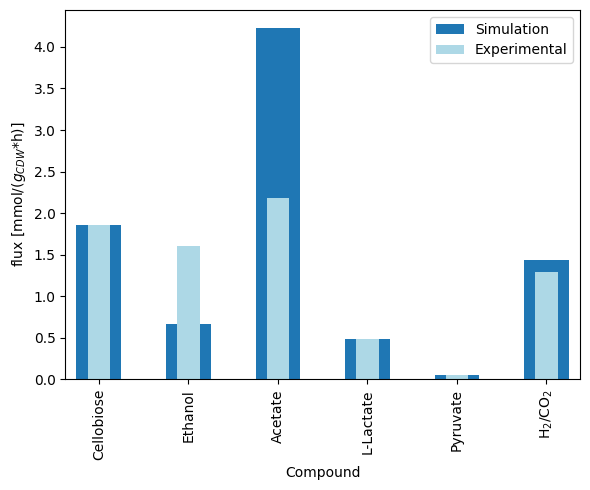

In [161]:
reactions=["R_EX_cellb_e","R_EX_etoh_e","R_EX_ac_e","R_EX_lac__L_e","R_EX_pyr_e","R_EX_co2_e","R_EX_h2_e"]

fix,ax = plt.subplots(figsize = (6,5))
sol_dict = {rxn:abs(sol.values[rxn]) for rxn in reactions}
sol_df = pd.Series(sol_dict)
sol_df["h2/co2"]=sol_df["R_EX_h2_e"]/sol_df["R_EX_co2_e"]
sol_df= sol_df[(sol_df.index!="R_EX_h2_e") & (sol_df.index!="R_EX_co2_e") ]
sol_df.plot(ax=ax,kind="bar")

exp = pd.Series({"Cellobiose":q_cellb[-2],"Ethanol":q_etoh[-2],"Acetate":q_ac[-2],"L-Lactate":q_lac[-2],"Pyruvate":50/1000,"H$_2$/CO$_2$":1.29})
exp.plot(ax=ax,kind="bar",color="lightblue",width=0.25)

plt.legend(["Simulation","Experimental"])
plt.xlabel("Compound")
plt.ylabel("flux [mmol/($g_{CDW}$*h)]")

plt.tight_layout()
plt.savefig("../figures/steady_state.png")

In [46]:
model = load_cbmodel("../models/RcH10_final.xml")

#model.reactions.R_LDH_L.lb = -q_lac[-2]
#model.reactions.R_POR_syn.ub = 5.45
#model.add_ratio_constraint("R_EX_h2_e","R_EX_cellb_e",-4)

env_cellb['R_EX_cellb_e'] = (-q_cellb[-2], -q_cellb[-2])
model.reactions.R_Growth.ub =max(mu)
env_cellb.apply(model, exclusive=True, inplace=True, warning=False)

sol = pFBA(model,constraints={"R_EX_gal_e":0,"R_EX_rib__D_e":0,"R_EX_acald_e":0,"R_LDH_D":0})#,"R_EX_pyr_e":(50/1000)

Text(0, 0.5, 'flux [mmol/(gbio*h)]')

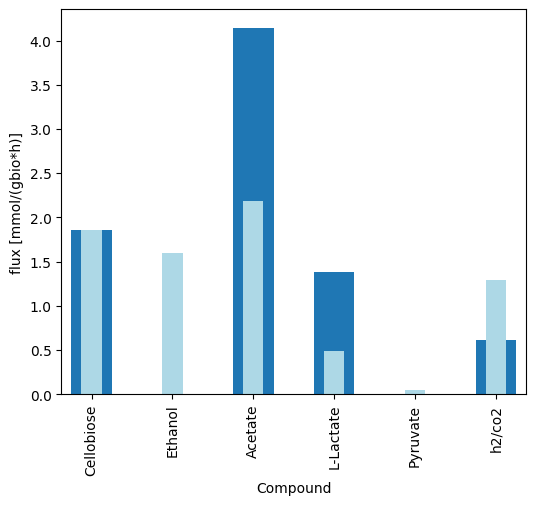

In [47]:
reactions=["R_EX_cellb_e","R_EX_etoh_e","R_EX_ac_e","R_EX_lac__L_e","R_EX_pyr_e","R_EX_co2_e","R_EX_h2_e"]

fix,ax = plt.subplots(figsize = (6,5))
sol_dict = {rxn:abs(sol.values[rxn]) for rxn in reactions}
sol_df = pd.Series(sol_dict)
sol_df["h2/co2"]=sol_df["R_EX_h2_e"]/sol_df["R_EX_co2_e"]
sol_df= sol_df[(sol_df.index!="R_EX_h2_e") & (sol_df.index!="R_EX_co2_e") ]
sol_df.plot(ax=ax,kind="bar")

exp = pd.Series({"Cellobiose":q_cellb[-2],"Ethanol":q_etoh[-2],"Acetate":q_ac[-2],"L-Lactate":q_lac[-2],"Pyruvate":50/1000,"h2/co2":1.29})

exp.plot(ax=ax,kind="bar",color="lightblue",width=0.25)
plt.xlabel("Compound")
plt.ylabel("flux [mmol/(gbio*h)]")